In [10]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [147]:
data =pd.read_csv('Bakery.csv')

In [148]:
df=data.copy()

In [5]:
# checking Null values
df.isnull().sum()

TransactionNo    0
Items            0
DateTime         0
Daypart          0
DayType          0
dtype: int64

In [6]:
# checking shape of data
df.shape

(20507, 5)

In [7]:
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


In [8]:
df.tail()

,TransactionNo,Items,DateTime,Daypart,DayType
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend
20506,9684,Smoothies,2017-09-04 15:04:24,Afternoon,Weekend


In [31]:
#columns data type
df.dtypes

TransactionNo     int64
Items            object
DateTime         object
Daypart          object
DayType          object
dtype: object

In [36]:
# changing columns data type
df['DateTime']=pd.to_datetime(df['DateTime'])
df.dtypes

TransactionNo             int64
Items                    object
DateTime         datetime64[ns]
Daypart                  object
DayType                  object
dtype: object

In [41]:
# fetch year,month and day from DateTime
df['Year']=pd.DatetimeIndex(df['DateTime']).year
df['Month']=pd.DatetimeIndex(df['DateTime']).month
df['Day']=pd.DatetimeIndex(df['DateTime']).weekday

In [43]:
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType,Year,Month,Day
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,2016,10,6
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016,10,6
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016,10,6
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,2016,10,6
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,2016,10,6


In [53]:
#checking unique values in Day column
sorted(df['Day'].unique())

[0, 1, 2, 3, 4, 5, 6]

In [55]:
#checking unique values in Day column
sorted(df['Month'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [68]:
df['Year'].unique()

array([2016, 2017], dtype=int64)

In [57]:
#replacing values
df['Day']=df['Day'].replace((0, 1, 2, 3, 4, 5, 6),('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','sunday'))
df['Month']=df['Month'].replace((1,2,3,4,5,6,7,8,9,10,11,12),('January','February' ,'March' ,'April' ,'May' ,'June' ,'July' ,'August' ,'September','October' ,'November' ,'December' ))

In [58]:
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType,Year,Month,Day
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,2016,October,sunday
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016,October,sunday
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016,October,sunday
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,2016,October,sunday
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,2016,October,sunday


In [20]:
#checking top 15 saling item
top_products=df['Items'].value_counts().head(15).reset_index(name='Quantity')
top_products=top_products.rename(columns={'index':'Items'})
top_products

,Items,Quantity
0,Coffee,5471
1,Bread,3325
2,Tea,1435
3,Cake,1025
4,Pastry,856
5,Sandwich,771
6,Medialuna,616
7,Hot chocolate,590
8,Cookies,540
9,Brownie,379


Text(0.5, 1.0, 'Top 15 Items sold in 2016 & 2017')

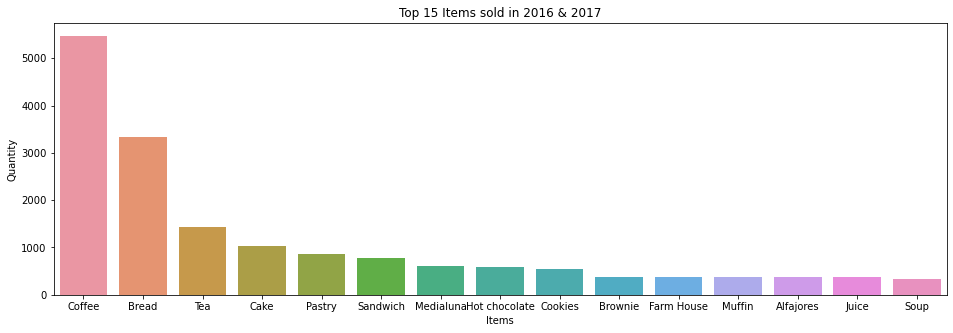

In [77]:
plt.figure(figsize=(16,5))
sns.barplot(x='Items',y='Quantity',data=top_products);
plt.title('Top 15 Items sold in 2016 & 2017')

In [63]:
Item_Sold_Year=df.groupby('Year')['Items'].value_counts().reset_index(name='Quantity')

In [64]:
Item_Sold_Year.head()

,Year,Items,Quantity
0,2016,Coffee,2214
1,2016,Bread,1390
2,2016,Tea,577
3,2016,Pastry,366
4,2016,Medialuna,362


In [72]:
Item_Sold_Year[Item_Sold_Year['Year']==2016]

,Year,Items,Quantity
0,2016,Coffee,2214
1,2016,Bread,1390
2,2016,Tea,577
3,2016,Pastry,366
4,2016,Medialuna,362
...,...,...,...
65,2016,Chicken sand,1
66,2016,Honey,1
67,2016,Olum & polenta,1
68,2016,Polenta,1


Text(0.5, 1.0, 'Top 15 Items sold in 2016')

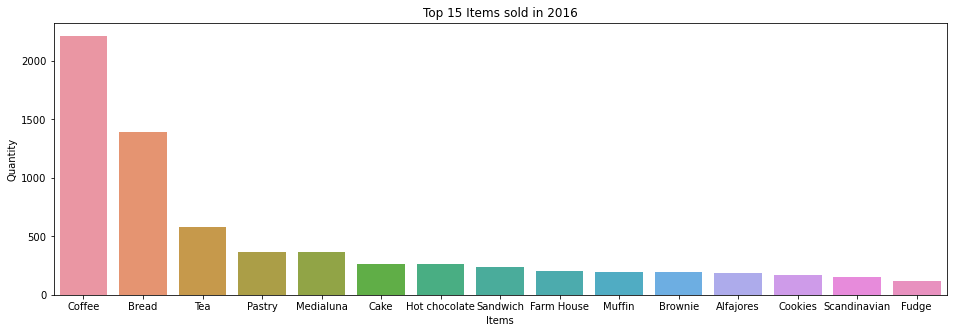

In [78]:
plt.figure(figsize=(16,5))
sns.barplot(x='Items',y='Quantity',data=Item_Sold_Year[Item_Sold_Year['Year']==2016].head(15));
plt.title('Top 15 Items sold in 2016')

Text(0.5, 1.0, 'Top 15 Items sold in 2017')

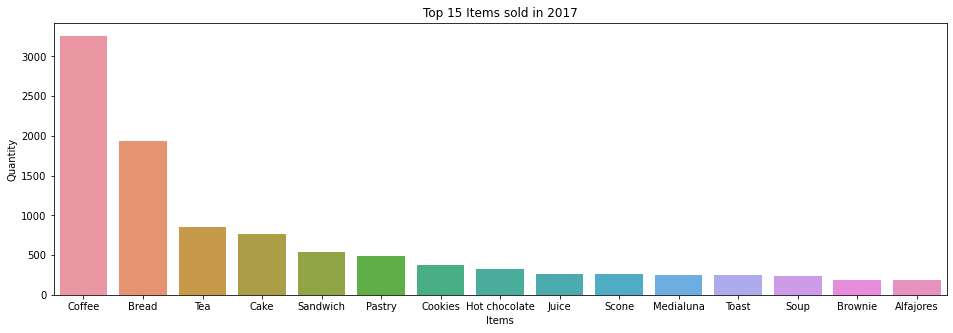

In [95]:
plt.figure(figsize=(16,5))
sns.barplot(x='Items',y='Quantity',data=Item_Sold_Year[Item_Sold_Year['Year']==2017].head(15));
plt.title('Top 15 Items sold in 2017')

In [84]:
#Sale By year
df.groupby('Year')['TransactionNo'].count().reset_index()

,Year,TransactionNo
0,2016,8144
1,2017,12363


<AxesSubplot:xlabel='Year', ylabel='TransactionNo'>

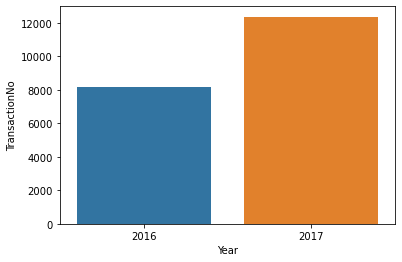

In [85]:
sns.barplot(x='Year',y='TransactionNo',data=df.groupby('Year')['TransactionNo'].count().reset_index())

In [93]:
pd.pivot_table(df,index='Month',columns=['Year'],aggfunc='count',values='TransactionNo')

Year,2016,2017
Month,,
April,308,740
August,212,488
December,2316,331
February,268,2480
January,233,2794
July,229,512
June,307,432
March,380,2840
May,392,532


In [114]:
#Sale by week
temp=pd.pivot_table(df,index='Day',columns=['Year'],values='TransactionNo',aggfunc='count')
temp

Year,2016,2017
Day,,
Friday,1216,2050
Monday,1359,1676
Saturday,1284,2270
Thursday,1050,1551
Tuesday,975,1670
Wednesday,1069,1219
sunday,1191,1927


In [119]:
df['Daypart'].unique()

array(['Morning', 'Afternoon', 'Evening', 'Night'], dtype=object)

In [121]:
df[(df['Daypart']=='Evening')&(df['Year']==2016)]

TransactionNo    201
Items            201
DateTime         201
Daypart          201
DayType          201
Year             201
Month            201
Day              201
dtype: int64

In [123]:
df.groupby('Daypart')['TransactionNo'].count().reset_index()

,Daypart,TransactionNo
0,Afternoon,11569
1,Evening,520
2,Morning,8404
3,Night,14


In [131]:
temp=df[(df['Year']==2016)&(df['DayType']=='Weekend')]['Items'].value_counts().reset_index()

In [132]:
temp

,index,Items
0,Coffee,715
1,Bread,480
2,Tea,173
3,Medialuna,154
4,Hot chocolate,112
5,Pastry,107
6,Cake,89
7,Muffin,89
8,Brownie,76
9,Scandinavian,75


In [134]:
df.columns

Index(['TransactionNo', 'Items', 'DateTime', 'Daypart', 'DayType', 'Year',
       'Month', 'Day'],
      dtype='object')

In [135]:
temp=df.groupby(['TransactionNo','Items'])['Items'].count().reset_index(name='Quantity')

In [146]:
temp

,TransactionNo,Items,Quantity
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1
...,...,...,...
18882,9682,Tacos/Fajita,1
18883,9682,Tea,1
18884,9683,Coffee,1
18885,9683,Pastry,1


In [138]:
datapivot=temp.pivot_table(index='TransactionNo',columns='Items',values='Quantity',aggfunc='sum').fillna(0)
datapivot

Items,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
TransactionNo,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [193]:
def table(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

datapivottable=datapivot.applymap(table)
datapivottable

Items,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
TransactionNo,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [194]:
#find Frequent Combinations
from mlxtend.frequent_patterns import apriori

In [195]:
frequent_combination=apriori(datapivottable,min_support=0.01,use_colnames=True)

In [196]:
frequent_combination

,support,itemsets
0,0.036344,(Alfajores)
1,0.016059,(Baguette)
2,0.327205,(Bread)
3,0.040042,(Brownie)
4,0.103856,(Cake)
...,...,...
56,0.023666,"(Coffee, Toast)"
57,0.014369,"(Sandwich, Tea)"
58,0.010037,"(Cake, Bread, Coffee)"
59,0.011199,"(Bread, Coffee, Pastry)"


In [197]:
#Association Rules
from mlxtend.frequent_patterns import association_rules

In [233]:
rules=association_rules(frequent_combination,min_threshold=0.4)

In [234]:
rules.shape

(16, 9)

In [235]:
rules.sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
12,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
6,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
8,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
5,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
9,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
2,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
10,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
3,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


In [236]:
#pip install networkx

In [237]:
import networkx as nx
import apriori_helper as ap

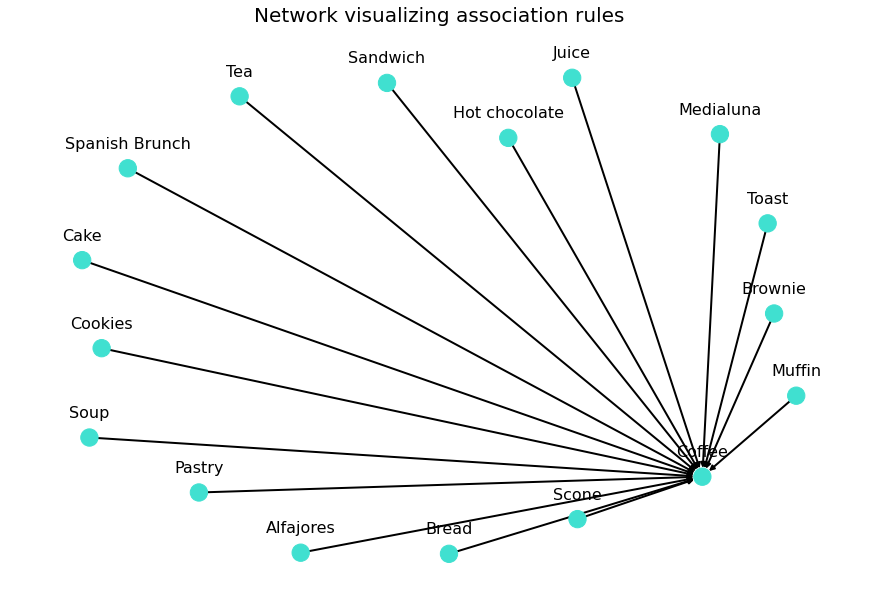

In [238]:
ap.draw_graph(rules,16)

In [229]:
import re
def replace_parenthesis(String):
    String=re.sub("[()]","", str(String))
    return String

In [230]:
replace_parenthesis('(Toast)')

'Toast'

In [240]:
rules['antecedents']=rules['antecedents'].apply(lambda x:"".join(x))
rules['consequents']=rules['consequents'].apply(lambda x:"".join(x))

In [241]:
rules
    

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,Alfajores,Coffee,0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
1,Brownie,Coffee,0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293
2,Cake,Coffee,0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
3,Cookies,Coffee,0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
4,Hot chocolate,Coffee,0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553
5,Juice,Coffee,0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
6,Medialuna,Coffee,0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
7,Muffin,Coffee,0.038457,0.478394,0.018806,0.489011,1.022193,0.000408,1.020777
8,Pastry,Coffee,0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
9,Sandwich,Coffee,0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
